In [1]:
!pip install surprise
from surprise import Dataset, Reader, SVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('fashion_products.csv')
print(data.head())

   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  


from surprise import Dataset, Reader, SVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
data.head(2)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L


In [4]:
data[data['Price'] < 40].shape[0]

322

In [5]:
data['Price'].sum()

55785

In [6]:
data.head(2)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L


In [7]:
data.drop(['Product ID', 'User ID'], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  1000 non-null   object 
 1   Brand         1000 non-null   object 
 2   Category      1000 non-null   object 
 3   Price         1000 non-null   int64  
 4   Rating        1000 non-null   float64
 5   Color         1000 non-null   object 
 6   Size          1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1000.0,55.785000,26.291748,10.000000,33.000000,57.000000,78.250000,100.000000
Rating,1000.0,2.993135,1.153185,1.000967,1.992786,2.984003,3.985084,4.987964


In [10]:
data[data['Rating'] < 4 ]

,Product Name,Brand,Category,Price,Rating,Color,Size
0,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
2,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,Shoes,Zara,Men's Fashion,23,1.049523,White,S
5,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
...,...,...,...,...,...,...,...
995,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [11]:
data['Rating'].mean()

2.9931351057620845

In [12]:
data[data['Brand']== 'Adidas']

,Product Name,Brand,Category,Price,Rating,Color,Size
0,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
2,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
4,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
10,T-shirt,Adidas,Men's Fashion,51,1.160988,Red,S
...,...,...,...,...,...,...,...
957,Shoes,Adidas,Men's Fashion,16,2.204638,Green,M
961,Shoes,Adidas,Women's Fashion,97,2.608359,Green,L
988,T-shirt,Adidas,Men's Fashion,78,4.715257,Black,S
994,Sweater,Adidas,Kids' Fashion,58,4.395112,Red,S


In [13]:
data[data['Brand']== 'Nike']

,Product Name,Brand,Category,Price,Rating,Color,Size
12,Jeans,Nike,Kids' Fashion,35,1.601194,Red,M
29,Sweater,Nike,Kids' Fashion,99,3.110114,Green,XL
31,T-shirt,Nike,Kids' Fashion,78,3.447289,White,XL
37,T-shirt,Nike,Kids' Fashion,76,2.663068,Yellow,S
43,Jeans,Nike,Kids' Fashion,74,2.039157,White,M
...,...,...,...,...,...,...,...
978,T-shirt,Nike,Men's Fashion,96,1.893289,Blue,S
980,Shoes,Nike,Women's Fashion,97,3.444968,White,XL
981,Jeans,Nike,Kids' Fashion,11,4.038689,Green,S
990,Shoes,Nike,Kids' Fashion,25,4.972677,Red,L


In [14]:
data['Brand'].describe()

count     1000
unique       5
top       Nike
freq       214
Name: Brand, dtype: object

In [15]:
data.corr()

<ipython-input-15-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Rating
Price,1.000000,0.033927
Rating,0.033927,1.000000


In [16]:
data.head(3)

,Product Name,Brand,Category,Price,Rating,Color,Size
0,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL


Data Visualization

In [17]:
data.columns

Index(['Product Name', 'Brand', 'Category', 'Price', 'Rating', 'Color',
       'Size'],
      dtype='object')

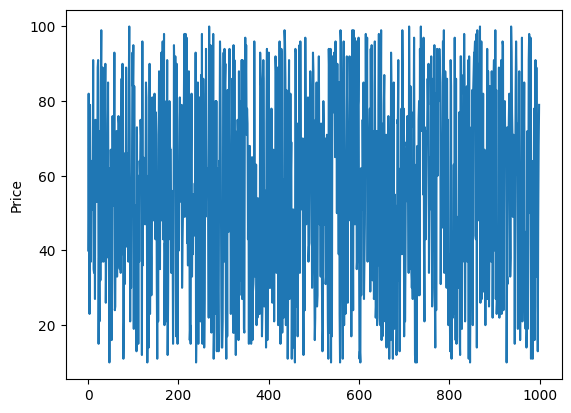

In [18]:
sns.lineplot(data['Price'])
plt.show()

<Axes: xlabel='clarity', ylabel='carat'>

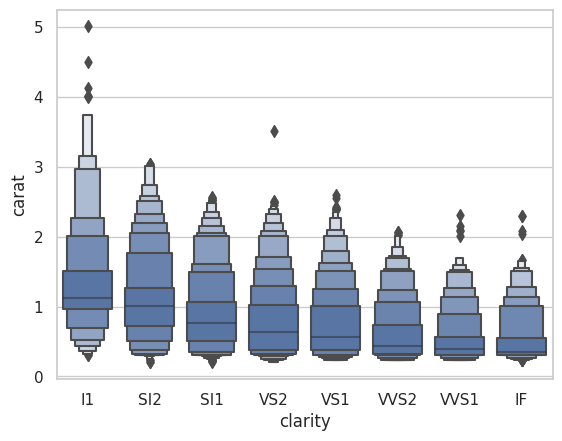

In [19]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)

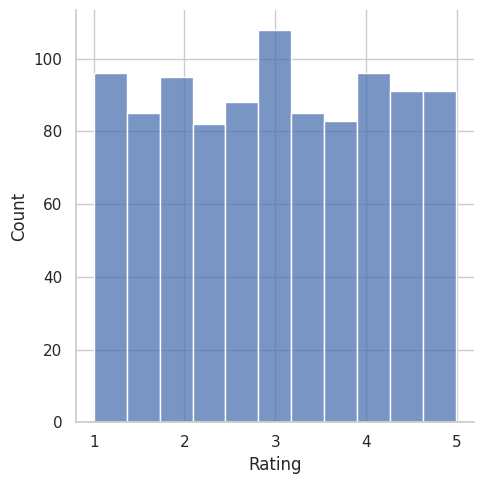

In [20]:
sns.displot(data['Rating'])
plt.show()

In [21]:
data.columns

Index(['Product Name', 'Brand', 'Category', 'Price', 'Rating', 'Color',
       'Size'],
      dtype='object')

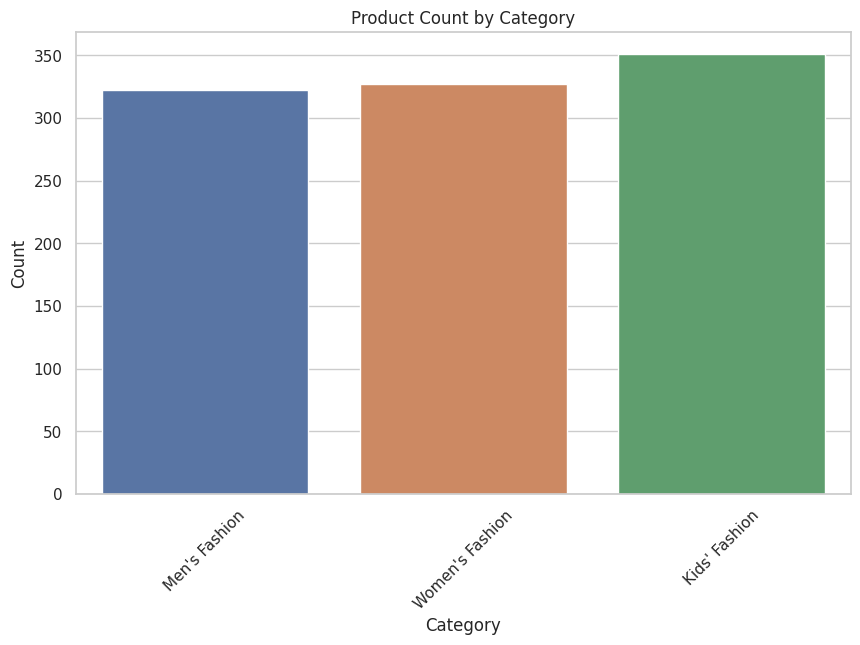

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Product Count by Category')
plt.xticks(rotation=45)
plt.show()

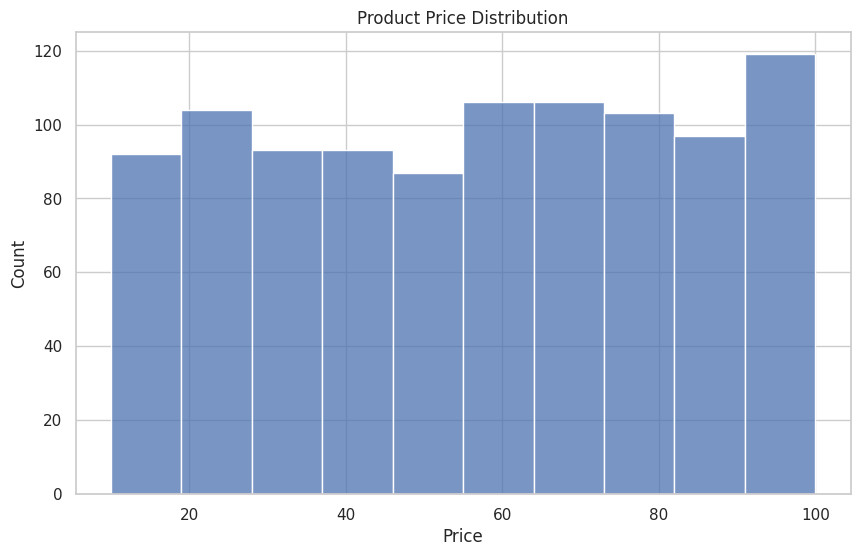

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Price', bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Product Price Distribution')
plt.show()


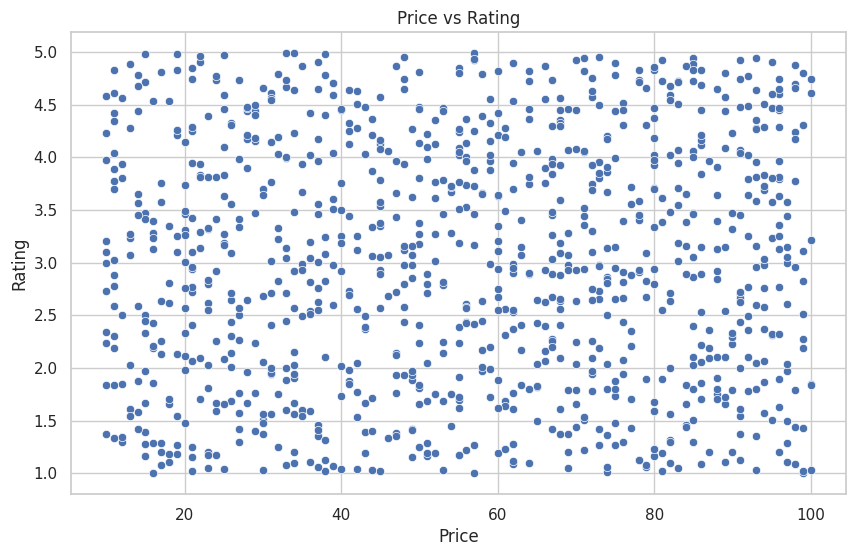

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price', y='Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.show()

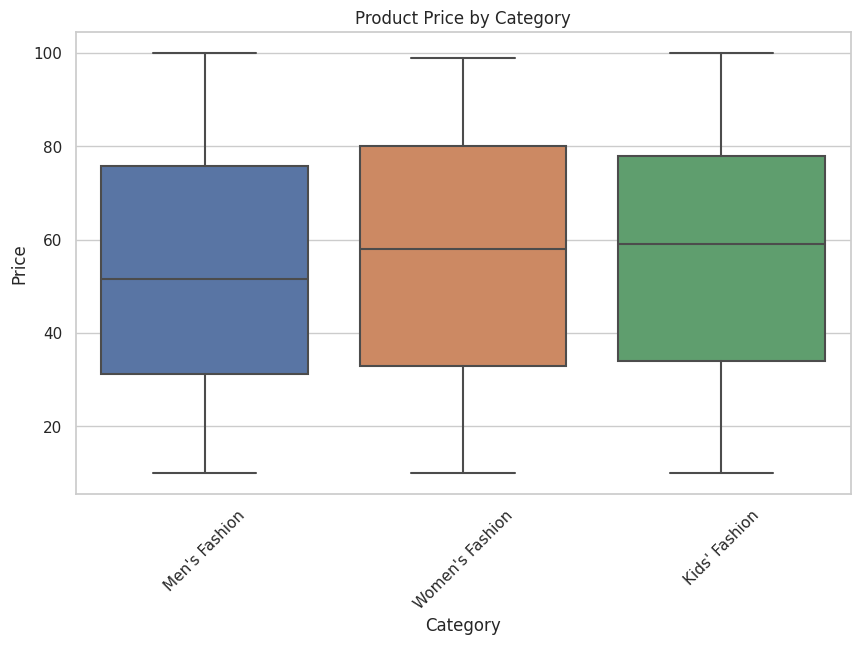

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Category', y='Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Product Price by Category')
plt.xticks(rotation=45)
plt.show()

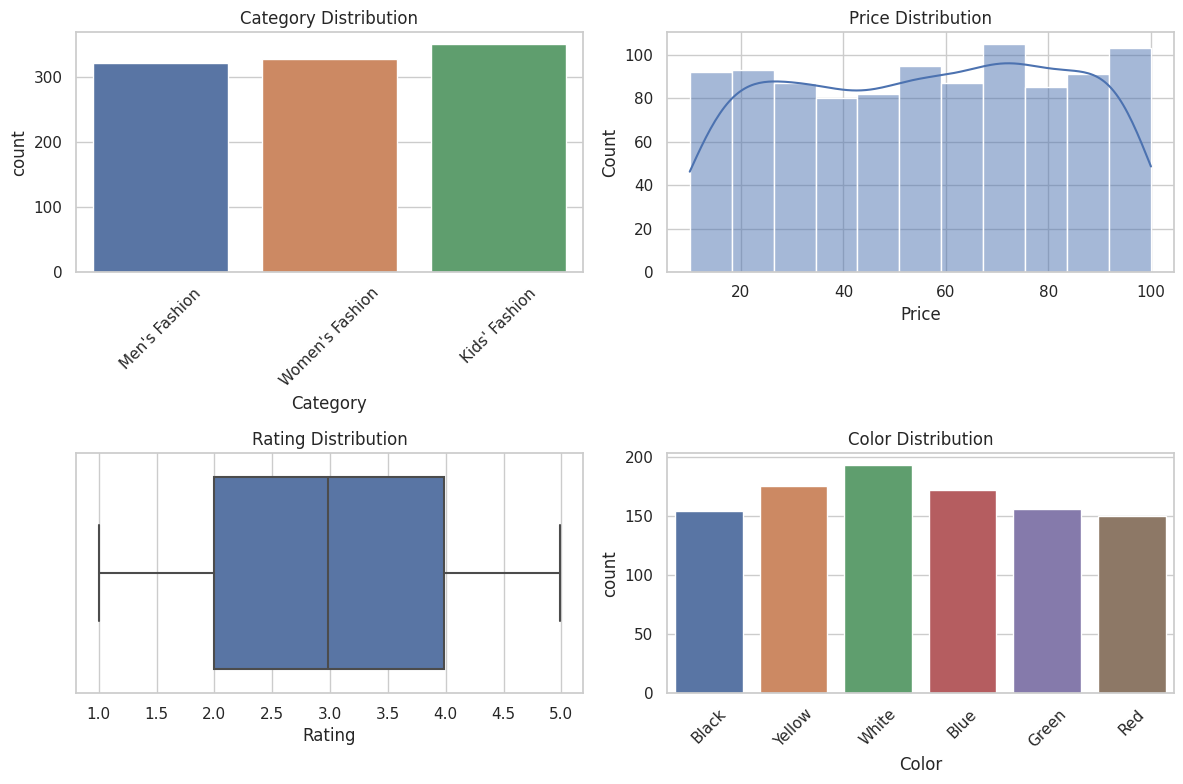

In [26]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar plot of categories
axs[0, 0].set_title('Category Distribution')
sns.countplot(x='Category', data=data, ax=axs[0, 0])
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Histogram of prices
axs[0, 1].set_title('Price Distribution')
sns.histplot(data=data, x='Price', kde=True, ax=axs[0, 1])

# Plot 3: Box plot of ratings
axs[1, 0].set_title('Rating Distribution')
sns.boxplot(data=data, x='Rating', ax=axs[1, 0])

# Plot 4: Bar plot of colors
axs[1, 1].set_title('Color Distribution')
sns.countplot(x='Color', data=data, ax=axs[1, 1])
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

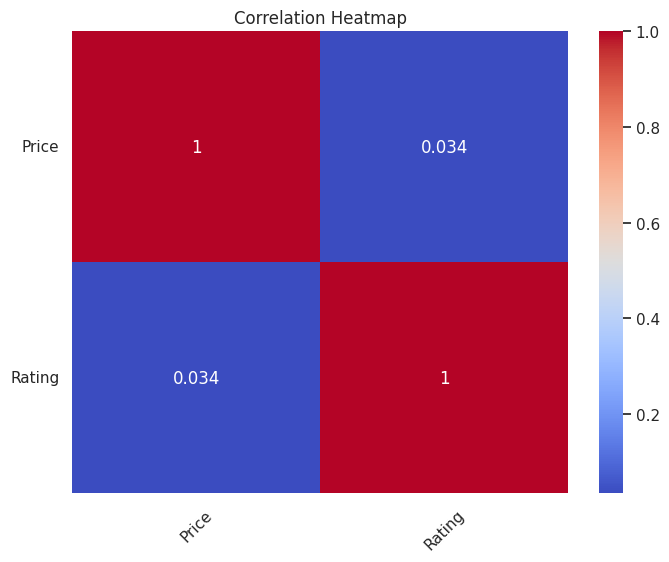

In [27]:
columns = ['Price', 'Rating']

# Compute the correlation matrix
corr_matrix = data[columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

Submission

In [28]:
data.to_csv('fashion-products_data.csv', index=True)